# Neural Networks from scratch
https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)

    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1)) # Bias initilized as Zero

    return params

In [5]:
params = init_params([1,1])
params

{'W1': array([[0.01788628]]), 'b1': array([[0.]])}

# ( W ) (Weight Matrix):

This is a matrix of weights. Each element in this matrix represents the strength of the connection between the input features and the neurons in the layer.

Dimensions: If you have ( n ) input features and ( m ) neurons in the layer, ( W ) will be an ( m * n )matrix.

# ( X ) (Input Vector/Matrix):

This is the input data. It can be a vector (for a single data point) or a matrix (for multiple data points).
Dimensions: If you have ( n ) input features, ( X ) will be an ( n * 1 ) vector for a single data point or an ( n * k ) matrix for ( k ) data points.

# ( b ) (Bias Vector):

This is a vector of biases. Each element in this vector is added to the corresponding neuron's weighted sum to shift the activation function.
Dimensions: If you have ( m ) neurons, ( b ) will be an ( m * 1 ) vector.


# ( W ) (Weight Matrix):

This is a matrix of weights. Each element in this matrix represents the strength of the connection between the input features and the neurons in the layer.

Dimensions: If you have ( n ) input features and ( m ) neurons in the layer, ( W ) will be an ( m \times n ) matrix.

# ( X ) (Input Vector/Matrix):

This is the input data. It can be a vector (for a single data point) or a matrix (for multiple data points).
Dimensions: If you have ( n ) input features, ( X ) will be an ( n \times 1 ) vector for a single data point or an ( n \times k ) matrix for ( k ) data points.

# ( b ) (Bias Vector):

This is a vector of biases. Each element in this vector is added to the corresponding neuron's weighted sum to shift the activation function.
Dimensions: If you have ( m ) neurons, ( b ) will be an ( m \times 1 ) vector.

### Example

Consider a simple example with a single data point:

- **Input Vector \( X \)**: 
  \[
  \begin{bmatrix}
  x_1 \\
  x_2
  \end{bmatrix}
  \]

- **Weight Matrix \( W \)**: 
  \[
  \begin{bmatrix}
  w_{11} & w_{12} \\
  w_{21} & w_{22}
  \end{bmatrix}
  \]

- **Bias Vector \( b \)**: 
  \[
  \begin{bmatrix}
  b_1 \\
  b_2
  \end{bmatrix}
  \]

The computation would be:

\[
Z = W dot X + b = 
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix}
dot
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
b_1 \\
b_2
\end{bmatrix}
\]

Breaking it down:

\[
Z = 
\begin{bmatrix}
(w_{11} \cdot x_1 + w_{12} \cdot x_2) \\
(w_{21} \cdot x_1 + w_{22} \cdot x_2)
\end{bmatrix}
+
\begin{bmatrix}
b_1 \\
b_2
\end{bmatrix}
\]

Linear Transformation
The equation Z = W * X + b represents a linear transformation of the input X using the weight matrix W and the bias vector b. This is a common step in neural networks before applying an activation function.

\[
Z = 
\begin{bmatrix}
(w_{11} \cdot x_1 + w_{12} \cdot x_2 + b_1) \\
(w_{21} \cdot x_1 + w_{22} \cdot x_2 + b_2)
\end{bmatrix}
\]

Sigmoid Function
The expression 1/(1+np.exp(np.dot(-1, Z))) is the sigmoid activation function applied to Z. The sigmoid function is defined as:

\begin{equation}
\sigma(Z) = \frac{1}{1 + e^{-Z}} 
\end{equation}




In [6]:
# Z (linear hypothesis) - Z = W*X + b , 
# * - dot product,
# W - weight matrix, b- bias vector, X- Input 
# This is a linear function called Sigmoid ativation function.
# It is used to introduce non-linearity in the model.
# Z can be a scalar a vector or a matrix.

# In this case Z = -1 dot Z + b
def sigmoid(Z):
    A = 1/(1+np.exp(np.dot(-1, Z))) # The dot product multiple the matrix with -1.
    cache = (Z)

    return A, cache
  
sigmoid(1)

(0.7310585786300049, 1)

In [7]:
Z = np.array([1, 2, 3])
np.dot(-1, Z) # This is equal to -1*Z or -Z

array([-1, -2, -3])

In [8]:
np.exp(np.dot(-1, Z))

array([0.36787944, 0.13533528, 0.04978707])

In [9]:
# Example
import numpy as np

# Define the weight matrix, input vector, and bias vector
W = np.array([[0.2, 0.8], [0.5, 0.1]])
X = np.array([[1], [2]])
b = np.array([[0.1], [0.2]])

# Perform the linear transformation
Z = np.dot(W, X) + b

# Apply the sigmoid activation function
A = 1 / (1 + np.exp(-Z)) # - is used to multiply the matrix with -1 and works seemlessly also with arrays

print("Z:", Z)
print("A:", A)

Z: [[1.9]
 [0.9]]
A: [[0.86989153]
 [0.7109495 ]]


In [14]:
def forward_prop(X, params):

    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2 # The number of layers in the network. Each layer has a weight and a bias, so the total number of parameters is twice the number of layers.
    print(f'Length of params: {len(params)}, L: {L}, Params: {params}')
    for l in range(1, L+1):
        A_prev = A

        # Debug
        print(f"Shape of W{str(l)}: {params['W'+str(l)].shape}")
        print(f"Shape of A_prev: {A_prev.shape}")
        
        # Linear Hypothesis - Using the formula Z = W*X + b
        print(f'Weight {"W"+str(l)}: {params["W"+str(l)]}, A_prev: {A_prev}, Bias: {params["b"+str(l)]}')
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 

        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        print(f'Linear Cache: {linear_cache}')
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        print(f'Sigmoid: {A}, Activation Cache: {activation_cache}')
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)

    return A, caches


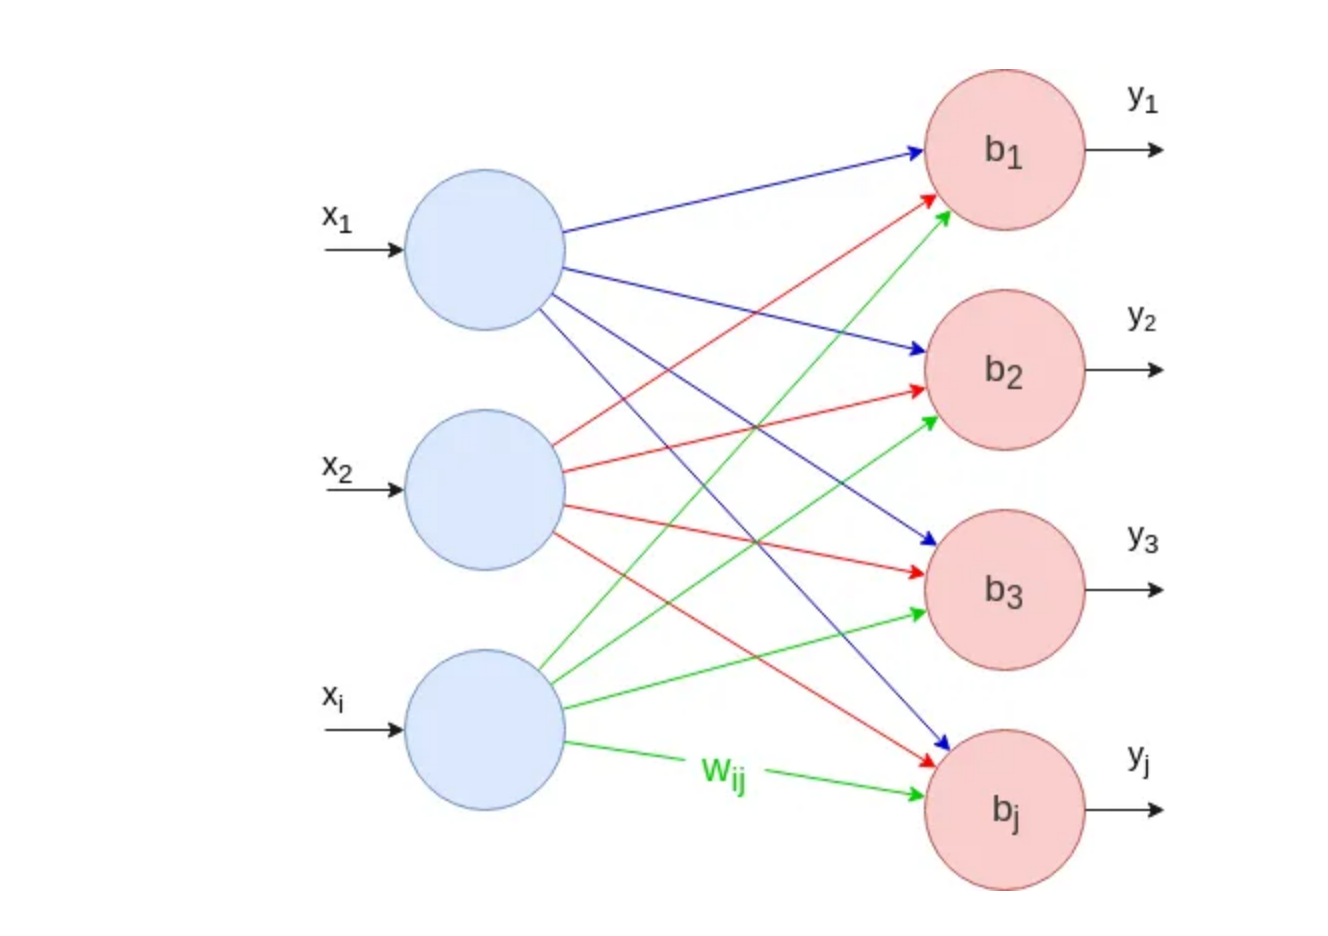

In [16]:
X = np.array([1,2]) # Neural Network Input
params = init_params([2, 1]) # Neural Network Parameters
print(f'X: {X}\nParams: {params}')

A, caches = forward_prop(X, params)

print(f"\nA:\t{A}\nCaches:\t{caches}")

X: [1 2]
Params: {'W1': array([[0.01788628, 0.0043651 ]]), 'b1': array([[0.]])}
Length of params: 2, L: 1, Params: {'W1': array([[0.01788628, 0.0043651 ]]), 'b1': array([[0.]])}
Shape of W1: (1, 2)
Shape of A_prev: (2,)
Weight W1: [[0.01788628 0.0043651 ]], A_prev: [1 2], Bias: [[0.]]
Linear Cache: (array([1, 2]), array([[0.01788628, 0.0043651 ]]), array([[0.]]))
Sigmoid: [[0.50665373]], Activation Cache: [[0.02661648]]

A:	[[0.50665373]]
Caches:	[((array([1, 2]), array([[0.01788628, 0.0043651 ]]), array([[0.]])), array([[0.02661648]]))]


`X=[[1,2]]`

```yaml
    params={
        'W1': array([[0.2, 0.8], [0.5, 0.1]]), 
        'b1': array([[0.1], [0.2]]),
        'W2': array([[0.3, 0.7]]),
        'b2': array([[0.3]])
    }
```



```mermaid
graph TD
    subgraph Input Layer
        X1[1] -->|W1| Z1
        X2[2] -->|W1| Z1
        X3[3] -->|W1| Z2
        X4[4] -->|W1| Z2
    end

    subgraph Hidden Layer 1
        Z1[Z1 = 0.2*1 + 0.8*2] -->| b1| Z1b
        Z2[Z2 = 0.5*3 + 0.1*4] -->| b1| Z2b
        Z1b[Z1b = Z1 + 0.1] -->|Sigmoid| A1
        Z2b[Z2b = Z2 + 0.2] -->|Sigmoid| A2
    end

    subgraph Output Layer
        A1 -->|W2| Z3
        A2 -->|W2| Z3
        Z3[Z3 = 0.3*A1 + 0.7*A2] -->| b2| Z3b
        Z3b[Z3b = Z3 + 0.3] -->|Sigmoid| A3
    end

    A3 --> FinalOutput[Output A3]
```

```mermaid
%%{init: {'theme': 'base', 'themeVariables': { 'primaryColor': '#ffcc00', 'edgeLabelBackground':'#ffffff', 'tertiaryColor': '#ffffff'}}}%%
graph LR
    subgraph Column1
        A[Input Vector/Matrix #40;X#41;] --> B[Weight Matrix #40;W#41;]
        A --> C[Bias Vector #40;b#41;]
        B --> D[Linear Transformation #40;Z = W * X + b#41;]
        C --> D
        D --> E[Activation Function #40;A = sigmoid#40;Z#41;#41;]
        E --> F[Output #40;A#41;]
    end

    subgraph Column2
        B_explanation[Weights applied to the input data]
        C_explanation[Biases added to the weighted sum]
        D_explanation[Linear combination of weights, inputs, and biases]
        E_explanation[Activation function applied to the linear transformation]
        F_explanation[Final output after applying the activation function]

        B -.-> B_explanation
        C -.-> C_explanation
        D -.-> D_explanation
        E -.-> E_explanation
        F -.-> F_explanation
    end
```

In [36]:
# Example with 2 layers
import numpy as np

# Example parameters
params = {
    'W1': np.array([[0.2, 0.8], [0.5, 0.1]]),
    'b1': np.array([[0.1], [0.2]]),
    'W2': np.array([[0.3, 0.7]]),
    'b2': np.array([[0.3]])
}

# Example input
X = np.array([[1, 2], [3, 4]])

# Perform forward propagation
A, caches = forward_prop(X, params)

print("Final Activation:", A)
print("Caches:", caches)

Length of params: 4, L: 2, Params: {'W1': array([[0.2, 0.8],
       [0.5, 0.1]]), 'b1': array([[0.1],
       [0.2]]), 'W2': array([[0.3, 0.7]]), 'b2': array([[0.3]])}
Weight W1: [[0.2 0.8]
 [0.5 0.1]], A_prev: [[1 2]
 [3 4]], Bias: [[0.1]
 [0.2]]
Linear Cache: (array([[1, 2],
       [3, 4]]), array([[0.2, 0.8],
       [0.5, 0.1]]), array([[0.1],
       [0.2]]))
Sigmoid: [[0.93702664 0.97587298]
 [0.73105858 0.83201839]], Activation Cache: [[2.7 3.7]
 [1.  1.6]]
Weight W2: [[0.3 0.7]], A_prev: [[0.93702664 0.97587298]
 [0.73105858 0.83201839]], Bias: [[0.3]]
Linear Cache: (array([[0.93702664, 0.97587298],
       [0.73105858, 0.83201839]]), array([[0.3, 0.7]]), array([[0.3]]))
Sigmoid: [[0.74891783 0.7640791 ]], Activation Cache: [[1.092849   1.17517476]]
Final Activation: [[0.74891783 0.7640791 ]]
Caches: [((array([[1, 2],
       [3, 4]]), array([[0.2, 0.8],
       [0.5, 0.1]]), array([[0.1],
       [0.2]])), array([[2.7, 3.7],
       [1. , 1.6]])), ((array([[0.93702664, 0.97587298],
  

# Let's now define our cost function.